<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 5: Proceso de Selección de Métodos</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 5.5: Clasificador Bayesiano Ingenuo (Naïve Bayes)</center></font>
</div>

## CLASIFICADOR BAYESIANO INGENUO (NAÏVE BAYES, NB)

#### ¿Qué es el modelo Naïve Bayes?

En un sentido amplio, los modelos de **Naïve Bayes (NB)** son una clase especial de algoritmos de clasificación empleados en el **Aprendizaje Automatico (Machine Learning)**, los cuales se basan en una técnica de clasificación estadística llamada ***Teorema de Bayes***.

Estos modelos son llamados algoritmos “*Naïve*” (“*Ingenuo*”), ya que en ellos se asume que las variables predictoras son independientes entre sí. En otras palabras, que la presencia de una cierta característica en un conjunto de datos no está en absoluto relacionada con la presencia de cualquier otra característica.

Este clasificador proporciona una manera fácil de construir modelos con un comportamiento adecuado debido a su simplicidad. Lo consiguen proporcionando una forma de calcular la probabilidad *posterior* de que ocurra un cierto evento **A**, dadas algunas probabilidades de eventos *anteriores*, lo cual se conoce como probabilidad condicionada la cual está expresada matemáticamente como:
<br>
<img src="./Imagenes/ProbCond.png" style="width:600px;height:133px;" class="center">
<br>
#### A manera de ejemplo
Consideremos el caso de dos compañeros que trabajan en la misma oficina: Alicia y Bruno. Sabemos que:
* Alicia viene a la oficina 3 días a la semana.
* Bruno viene a la oficina 1 día a la semana.

Esta es la información *anterior* que se conoce. Ahora, una persona que se encuentra en la oficina observa pasar a alguien tan rápido que no alcanza a distinguir si era Alicia o Bruno. Dada la información con la que se cuenta y asumiendo que solo trabajan 4 días a la semana, las probabilidades para identificar a la persona son:
* P(Alicia) = 3/4 = 0.75 o 75% 
* P(Bruno) = 1/4 = 0.25 o 25%

Sin embargo, fue posible ver que la persona llevaba una chamarra roja. Se sabe de antemano que:
* Alicia viste de rojo 2 veces a la semana.
* Bruno viste de rojo 3 veces a la semana.

Debido a ello, para cada semana de trabajo (de cinco días), se puede inferir que:
* La probabilidad de que Alicia vista de rojo es → P(Rojo|Alicia) = 2/5 = 0.4 o 40%
* La probabilidad de que Bruno vista de rojo → P(Rojo|Bruno) = 3/5 = 0.6 o 60%

Con base en estos datos, ¿quién fue la persona que pasó? Esta nueva probabilidad es la información *posterior* que el modelo es capaz de proporcionar. Se puede visualizar de la siguiente manera:
<br>
<img src="./Imagenes/PB1.png" style="width:600px;height:236px;" class="center">
<br>
De manera general, esto es:
<br>
<img src="./Imagenes/PB2.png" style="width:600px;height:239px;" class="center">
<br>
#### Pros y contras
Los pros que tiene el modelo **Naïve Bayes** son:
* Es una manera fácil y rápida de predecir clases, para problemas de clasificación binarios y multiclase.
* En los casos en que sea apropiada una presunción de independencia, el algoritmo se comporta mejor que otros modelos de clasificación, incluso con menos datos de entrenamiento.
* El desacoplamiento de las distribuciones de características condicionales de clase significan que cada distribución puede ser estimada independientemente como si tuviera una sola dimensión. Esto ayuda con problemas derivados de la dimensionalidad y mejora el rendimiento.

Los contras que tiene el modelo **Naïve Bayes** son:
* Aunque son unos clasificadores bastante buenos, los algoritmos **Naïve Bayes** son conocidos por ser pobres estimadores. Por ello, no se deben tomar muy en serio las probabilidades que se obtienen.
* La presunción de independencia Naïve muy probablemente no reflejará cómo son los datos en el mundo real.
* Cuando el conjunto de datos de prueba tiene una característica que no ha sido observada en el conjunto de entrenamiento, el modelo le asignará una probabilidad de cero y será inútil realizar predicciones. Uno de los principales métodos para evitar esto, es la técnica de suavizado, siendo la ***Estimación de Laplace*** una de las más populares.

### Implementación de un ejemplo
Para este ejemplo se tomarán 200 registros para realizar la determinación a través del modelo **Naïve Bayes** de la conveniencia de comprar o alquilar una casa, basados en los gastos que se tienen. Para ello se emplearán las librerías que ya son conocidas, como **Pandas**, **NumPy**, **Matplotlib**, **Seaborn** y **SciKit-Learn**.
<br>
<img src="./Imagenes/Logos.png" style="width:400px;height:145px;" class="center">
<br>

Los datos de entrada que se usarán están contenidos en el archivo `CompraAlquila.csv`, el cual contiene los siguientes encabezados de las columnas de información:

1. `Ingresos`: Son los ingresos mensuales de la familia.
2. `Gastos_Comunes`: Son los pagos mensuales de luz, agua, gas, etc.
3. `Pago_Auto`: Son los pagos mensuales de cuotas por uno o más automóviles, así como gastos en combustible.
4. `Gastos_Otros`: Son compras mensuales en supermercados.
5. `Ahorros`: Es la suma de los ahorros disponibles para ser empleados en la compra de la casa.
6. `Vivienda`: Es el precio de la vivienda que se quiere comprar.
7. `Estado_Civil`: Consiste de los campos:
    * `0`: Soltero.
    * `1`: Casado.
    * `2`: Divorciado.
8. `Hijos`: Es la cantidad de hijos menores de la familia y que no trabajan.
9. `Trabajo`: Consiste de los campos:
    * `0`: Sin empleo. 
    * `1`: Autónomo (freelance).
    * `2`: Empleado.
    * `3`: Empresario.
    * `4`: En pareja, ambos autónomos.
    * `5`: En pareja, ambos empleados.
    * `6`: En pareja, ambos autónomos y asalariados.
    * `7`: En pareja, ambos empresarios y autónomos.
    * `8`: En pareja: empresarios los dos, o empresario y empleado.
10. `Comprar`: Esta será la columna de salida para el proceso de aprendizaje. Consiste de los campos:
    * `0`: No comprar. 
    * `1`: Si comprar.
    
Algunos supuestos para el problema formulado:

* Está pensado en dólares americanos (USD), pero podría ser cualquier otra moneda.
* No tiene en cuenta ubicación geográfica, ya que los precios de los inmuebles dependerán de la zona.
* Se supone una hipoteca fija a 30 años con interés de mercado *bajo*.

**El problema consiste en tomar una decisión sobre comprar (1) o alquilar (0) una casa con la información proporcionada, para ello se requiere que el algoritmo aprenda de los datos suministrados.**

Para ello, primeramente se importarán las librerías **Pandas**, **NumPy**, **Matplotlib**, **Seaborn** y **Scikit-Learn**:

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (16, 9)}) 
plt.style.use('ggplot')

Ahora se realiza la lectura del DataSet desde un archivo `CSV` y se guarda en un **DataFrame** de **Pandas**:

In [2]:
#Lectura del DataSet
datos_df = pd.read_csv("./Datos/CompraAlquila.csv")

#Impresión de los Resultados
print("La cantidad de registros en el DataFrame (renglones) es:", datos_df.shape[0])
print("El DataFrame es:")
datos_df.head(10)

La cantidad de registros en el DataFrame (renglones) es: 200
El DataFrame es:


,Ingresos,Gastos_Comunes,Pago_Auto,Gastos_Otros,Ahorros,Vivienda,Estado_Civil,Hijos,Trabajo,Comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


Se puede verificar la cantidad de registros `Si` (valor 0) y `No` (valor 1) que existen en la columna `Comprar`, para poder ver el contenido propio del **DataFrame**: 

In [3]:
#Mostrar las cantidades de registros "Si" y "No" en la columna "Comprar"
print("La cantidad de registros \"No\" en la columna \"Comprar\" es:", datos_df.groupby('Comprar').size()[0])
print("La cantidad de registros \"Si\" en la columna \"Comprar\" es:", datos_df.groupby('Comprar').size()[1])

La cantidad de registros "No" en la columna "Comprar" es: 133
La cantidad de registros "Si" en la columna "Comprar" es: 67


Sin considerar la columna `Comprar`, se puede verificar el histograma de las otras columnas numéricas para poder visualizar el comportamiento de cada una de ellas dentro del **DataSet**:

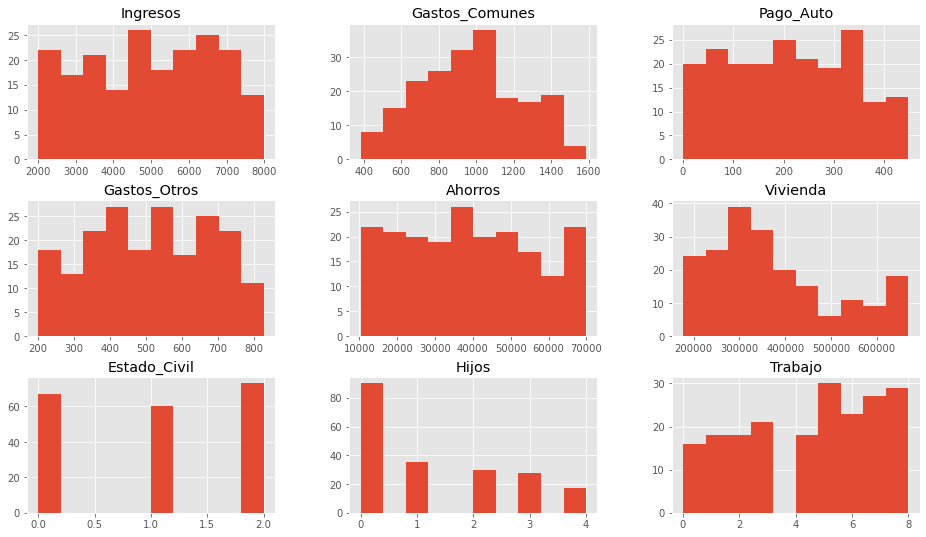

In [4]:
#Mostrar los histogramas del DataFrame
datos_df.drop(['Comprar'], axis=1).hist();
plt.show();

### Preprocesamiento de los Datos
Se crearán dos nuevas columnas en el **DataFrame** las cuales serán:

1. En la primera se agruparán los gastos mensuales, que corresponde a la suma de los valores en las columnas `Gastos_Comunes`, `Gastos_Otros` y `Pago_Auto`. A esta nueva columna se le llamará `Gastos`. 
2. En la segunda el monto a financiar para comprar la casa, esto corresponde a restar los valores de la columna `Ahorros` a la columna `Vivienda`. A esta nueva columna se le llamará `Financiar`.

In [5]:
#Determinación de la columna "Gastos"
datos_df['Gastos'] = (datos_df['Gastos_Comunes'] + datos_df['Gastos_Otros'] + datos_df['Pago_Auto'])

#Determinación de la columna "Financiar"
datos_df['Financiar'] = datos_df['Vivienda'] - datos_df['Ahorros']

#Mostrar el DataFrame sin las columnas "Gastos_Comunes", "Gastos_Otros" y "Pago_Auto"
datos_df.drop(['Gastos_Comunes','Gastos_Otros','Pago_Auto'], axis=1).head(10)

,Ingresos,Ahorros,Vivienda,Estado_Civil,Hijos,Trabajo,Comprar,Gastos,Financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
5,5692,50875,360863,1,4,5,1,1247,309988
6,6830,46761,429812,1,1,5,1,1952,383051
7,6470,57439,606291,0,0,1,0,1856,548852
8,6251,50503,291010,0,0,3,1,2030,240507
9,6987,40611,324098,2,1,7,1,1755,283487


### El Teorema de Bayes Aplicado al Ejemplo
Como se describió previamente, el **Teorema de Bayes** es una ecuación que describe la relación de probabilidades condicionales de cantidades estadísticas. En clasificación bayesiana se tiene el interés en encontrar la probabilidad de que ocurra una *clase* dadas unas características observadas (datos). 

Se puede escribir como **P(Clase|Datos)**. El **Teorema de Bayes** indica la manera como se puede expresar en términos de cantidades que se calculan directamente:
<br>
<img src="./Imagenes/bayes_01.png" style="width:330px;height:100px;" class="center">
<br>
Donde:

* **Clase**: Es una salida en particular, por ejemplo *Comprar*.
* **Datos**: Son las características, en el ejemplo son los Ingresos, Gastos, Hijos, etc.
* **P(Clase|Datos)**: Se llama *posterior*, es el resultado a determinar.
* **P(Datos|Clase)**: Se llama *verosimilitud* (en inglés es *likelihood*).
* **P(Clase)**: Se llama *anterior*, ya que es una probabilidad que ya se tiene.
* **P(Datos)**: Se llama *probabilidad marginal*.

Si se trata de elegir entre dos clases como en el ejemplo, donde se tiene *Comprar* ó *Alquilar*, entonces una manera de tomar la decisión es calcular la tasa de probabilidades a posterior:
<br>
<img src="./Imagenes/bayes_02.png" style="width:423px;height:100px;" class="center">
<br>
De esa manera es posible eliminar el denominador de la ecuación anterior (**P(Datos)**) conocido como *probabilidad marginal*.

### El Clasificador Gausiano Naïve Bayes
Uno de los tipos de clasificadores más populares es el llamado **Gaussian Naïve Bayes Classifier**, para el cual se apicarán dos clases (*Comprar* y *Alquilar*), así como tres características (*Ingresos*, *Ahorros* e *Hijos*). Por lo tanto se tiene:
<br>
<img src="./Imagenes/bayes_03.png" style="width:529px;height:200px;" class="center">
<br>
De esta ecuación, el valor **Posterior (Comprar)** corresponde a **P(comprar|datos)**, el cual es el valor que se pretende determinar. Además:

* **P(comprar)** Es la probabilidad con la que ya se cuenta. Es simplemente el número de veces que se selecciona *comprar=1* en el **DataFrame**, dividido entre el total de observaciones. Para este ejemplo (posteriormente se determinará en código) será 67/200.
* **p(ingresos|comprar)p(ahorros|comprar)p(hijos|comprar)**: Es la verosimilitud (likelihood). 

Los nombres Gaussian y Naïve vienen de dos suposiciones:
* Se asume que las características de la verosimilitud no estan correlacionadas entre ellas. Esto es, los ingresos son independientes a la cantidad de hijos y al ahorro con el que se cuenta. Como no es siempre cierto y es una suposición ingenua, de ahí el característico nombre **Naïve**.
* Se asume que el valor de las características (ingresos, hijos, etc.) tendrán una **Distribución Normal (Gausiana)**, esto permite calcular cada parte **p(ingresos|comprar)** usando la función de probabilidad de densidad normal.
* La **Probabilidad Marginal** es en muchas ocasiones muy complicada de calcular, sin embargo y como ya se describió, no será necesaria para obtener el valor *posterior*.

### Selección de Características (Feature Selection)
Para este ejercicio se realizará un proceso de **Selección de Características (Feature Selection)** para mejorar los resultados obtenidos con este algoritmo. 

Primeramente, es posible visualizar la correlación entre columnas (características) por medio del método `heatmap()` de la librería **Seaborn**. 

La descripción detallada del método `heatmap()` se puede consultar [en esta liga](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

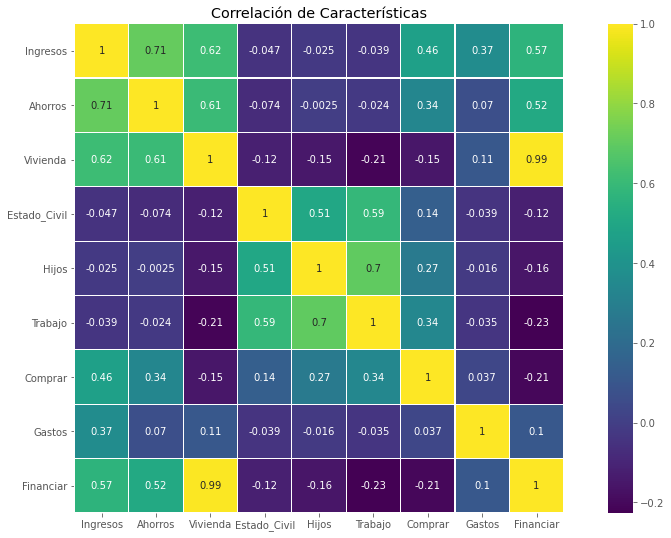

In [6]:
#Eliminación de columnas "Gastos_Comunes", "Gastos_Otros" y "Pago_Auto" del DataFrame
reduce_df = datos_df.drop(['Gastos_Comunes','Gastos_Otros','Pago_Auto'], axis=1)

#Mostrar la Correlación entre Columnas en el DataFrame
plt.title('Correlación de Características');
sb.heatmap(reduce_df.astype(float).corr(), 
           linewidths=0.1, 
           vmax=1.0, 
           square=True, 
           cmap='viridis', 
           linecolor='white', 
           annot=True);

En vez de utilizar todas las columnas del **DataFrame** como datos de entrada, se va a utilizar una clase de la librería **SciKit-Learn** llamada `SelectKBest` con la cual se hará la selección de las 5 mejores características, las cuales serán utilizadas.

La descripción detallada de la clase `SelectKBest` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

In [7]:
#Definición del valor X como el DataFrame excepto la columna "Comprar"
X = datos_df.drop(['Comprar'], axis = 1)

#Definición del valor y como la columna "Comprar"
y = datos_df['Comprar']

#Determinación de las 5 mejores características del DataFrame
best = SelectKBest(k = 5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices = True)

#Impresión de los Resultados
print("Las 5 mejores características del DataFrame son:\n", X.columns[selected])

Las 5 mejores características del DataFrame son:
 Index(['Ingresos', 'Ahorros', 'Hijos', 'Trabajo', 'Financiar'], dtype='object')


Con ello, podemos revisar la correlación entre las 5 mejores características del **DataFrame** que la clase `SelectKBest` ha proporcionado:

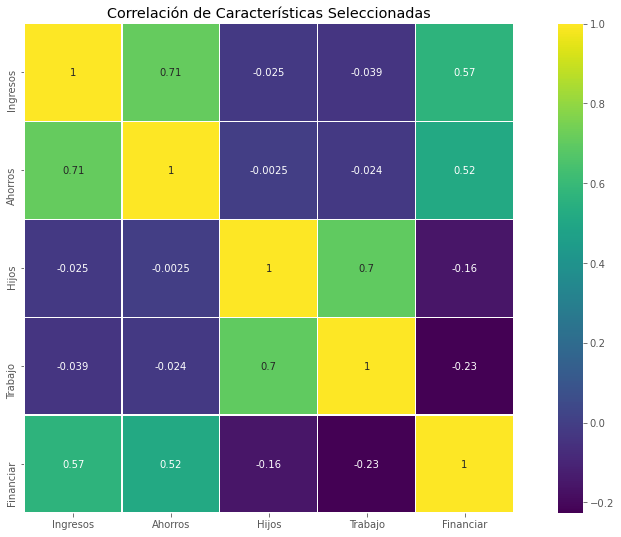

In [8]:
#Mostrar la Correlación entre las 5 mejores características del DataFrame
used_features = X.columns[selected]
plt.title('Correlación de Características Seleccionadas');
sb.heatmap(datos_df[used_features].astype(float).corr(),
           linewidths=0.1,
           vmax=1.0, 
           square=True, 
           cmap='viridis', 
           linecolor='white', 
           annot=True);

Con esto es posible comprobar que en general están poco correlacionadas, sin embargo también se tienen 4 valores superiores al 70%, solo resta esperar a que el algoritmo sea lo suficientemente "*naïve*" para proporcionar buenos resultados. 

Ahora se puede emplear el método `.pairplot()` de la librería **Seaborn**, la cual es usada para visualización estadística de datos. Con ello se mostrará el comportamiento por pares de cada una de las características seleccionadas para poder visualizar su nivel de correlación.

La descripción detallada del método `.pairplot()` se puede consultar [en esta liga](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

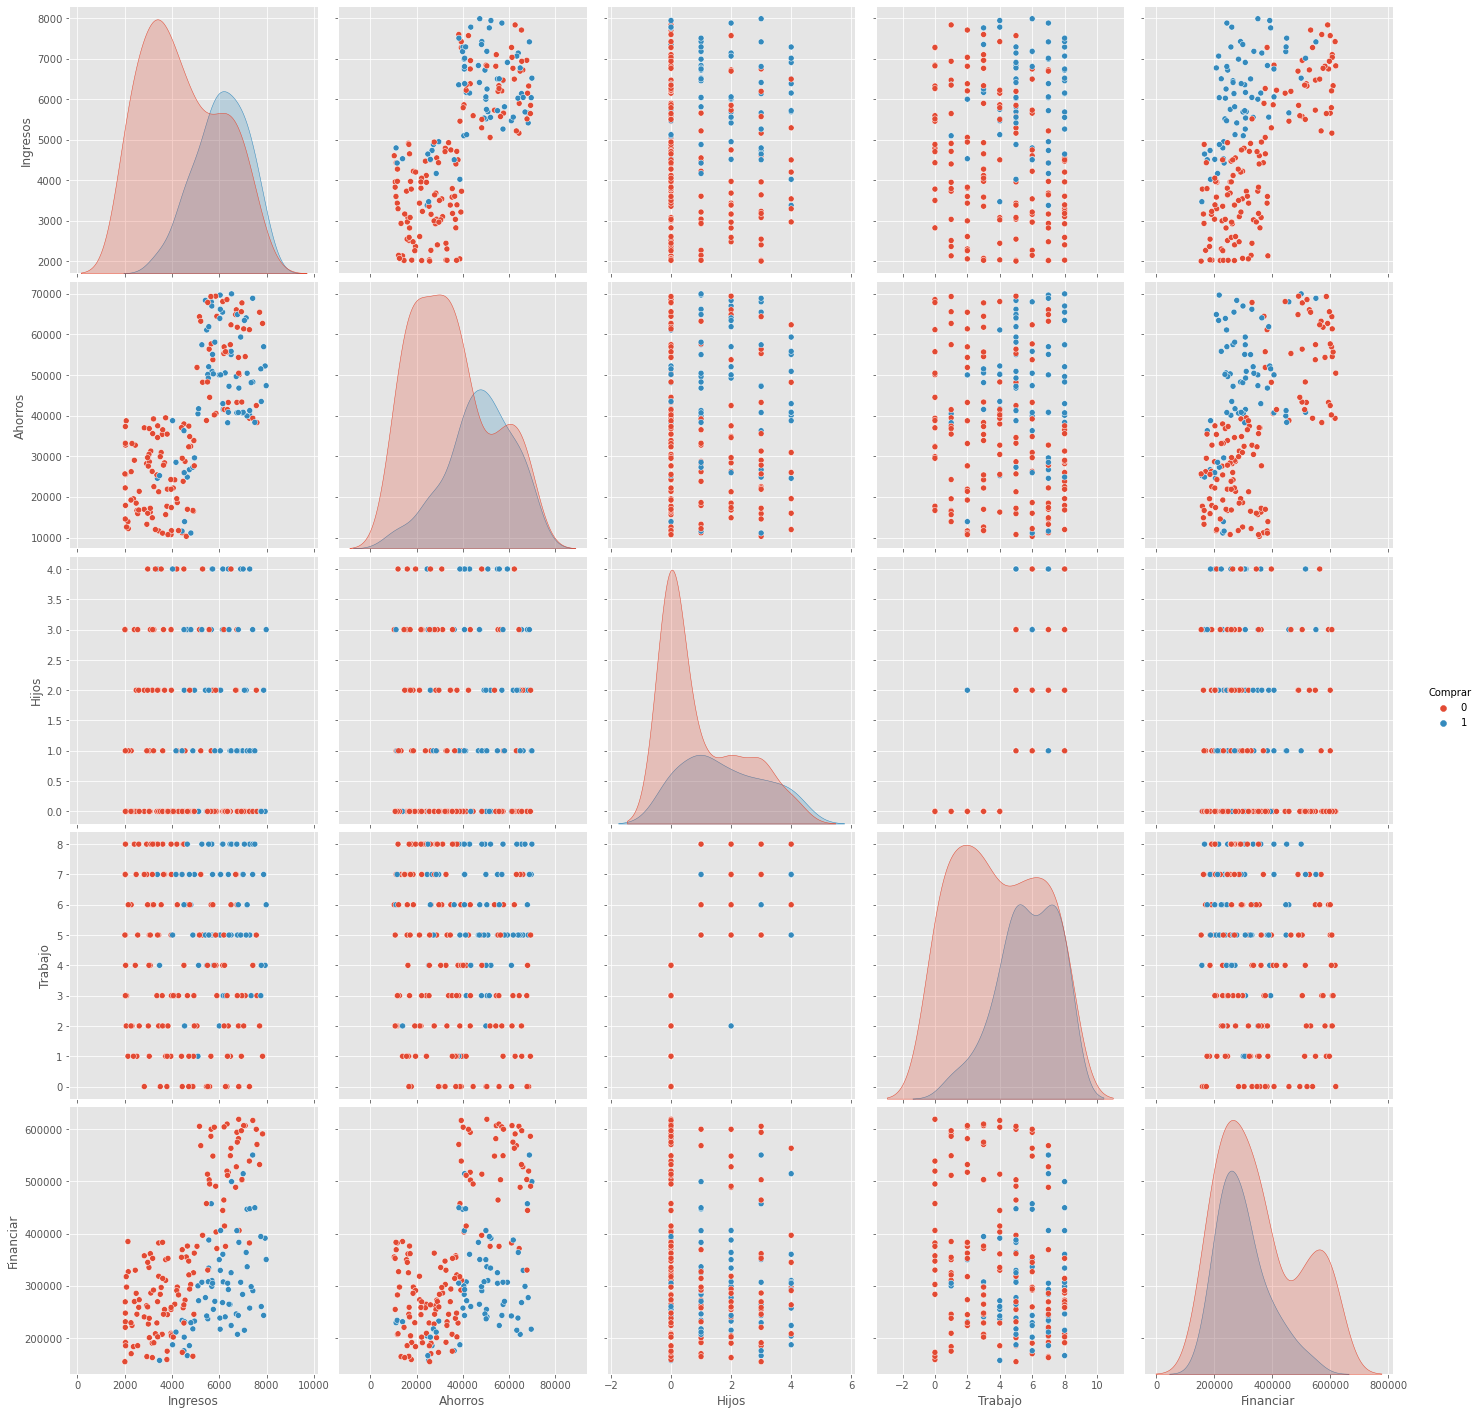

In [9]:
#Gráfico de las 5 mejores características del DataFrame
sb.pairplot(datos_df, hue = 'Comprar', height = 4, vars = used_features, kind = 'scatter');

Adicional a ello, podemos realizar el gráfico del comportamiento de dos de las características seleccionadas (en este caso serán `Ingresos` y `Financiar`). El siguiente código realiza un mapa de color que muestra la mejor zona para comprar (en `azul`) y la mejor zona para alquilar (en `rojo`):

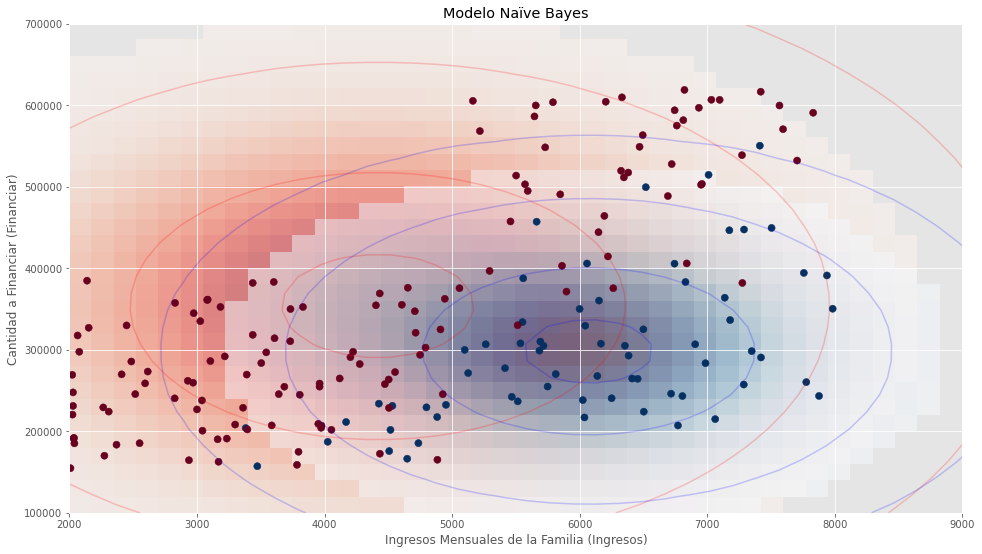

In [10]:
#Mapa de color para identificar zonas en base a dos características
used_features2 = ['Ingresos', 'Financiar']
X = datos_df[used_features2].values
y = datos_df['Comprar']

fig, ax = plt.subplots();

ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu');
ax.set_title('Modelo Naïve Bayes');

xlim = (2000, 9000)
ylim = (100000, 700000)

xg = np.linspace(xlim[0], xlim[1], 40)
yg = np.linspace(ylim[0], ylim[1], 30)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);
plt.xlabel("Ingresos Mensuales de la Familia (Ingresos)");
plt.ylabel("Cantidad a Financiar (Financiar)");

Entonces, es posible ver que cuantos más ingresos tiene la familia y menor es la cantidad a financiar, mejora la opción de comprar (zona marcada en `azul`). De lo contrario, lo mejor será alquilar (zona en `rojo`).

### Creación del Modelo Gausiano Naïve Bayes
Hasta el momento se ha realizado la selección de características del **DataFrame** así como mostrar los resultados en distintos tipos de gráficos. Ahora se realizará el modelo **Gaussian Naïve Bayes** para poder hacer una adecuada determinación.

Para ello, como primer paso se dividen los datos de entrada en grupos para entrenamiento y prueba a través del método `train_test_split()` de la librería **SciKit-Learn**.

La descripción detallada del método `train_test_split()` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [11]:
#Extracción de datos para entrenamiento y prueba
X_train, X_test = train_test_split(datos_df, test_size=0.2, random_state=6) 
y_train = X_train['Comprar']
y_test = X_test['Comprar']

#Revisión de los tamaños de los arreglos
print("El tamaño del arreglo de entrada (X) para entrenamiento es:", X_train.shape)
print("El tamaño del arreglo de entrada (X) para prueba es:", X_test.shape)
print("El tamaño del arreglo de salida (y) para entrenamiento es:", y_train.shape[0])
print("El tamaño del arreglo de salida (y) para prueba es:", y_test.shape[0])

El tamaño del arreglo de entrada (X) para entrenamiento es: (160, 12)
El tamaño del arreglo de entrada (X) para prueba es: (40, 12)
El tamaño del arreglo de salida (y) para entrenamiento es: 160
El tamaño del arreglo de salida (y) para prueba es: 40


A partir de los datos generados:

1. Se crea el modelo a través del método `GaussianNB()` de la librería **SciKit-Learn**, el cual quedará asignado a la variable **gnb**. 
2. Se realiza el entrenamiento del clasificador a través del método `.fit()`. 

La descripción detallada del método `GaussianNB()` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

In [12]:
#Creación del Modelo
gnb = GaussianNB()

#Entrenamiento del Clasificador
gnb.fit(X_train[used_features].values, y_train)

#Determinación de la Predicción
y_pred = gnb.predict(X_test[used_features])

Ahora es posible revisar la precisión que se tiene:

In [13]:
#Revisión de la precisión en el grupo de entrenamiento
print('La precisión en el grupo de Entrenamiento es: {:.2f}'.format(gnb.score(X_train[used_features], y_train)*100),"%")

#Revisión de la precisión en el grupo de prueba
print('La precisión en el grupo de Prueba es: {:.2f}'.format(gnb.score(X_test[used_features], y_test)*100),"%") 

La precisión en el grupo de Entrenamiento es: 86.25 %
La precisión en el grupo de Prueba es: 87.50 %


De los resultados es posible ver que se ha obtenido casi un 90% de aciertos en el conjunto de pruebas a través de este clasificador Bayesiano. 

Ahora, se realizarán dos predicciones para probar el modelo:
1. Será una familia sin hijos, con 2000 USD de ingresos que quiere comprar una casa de 200,000 USD y tiene sólo 5000 USD ahorrados.
2. Será una familia con 2 hijos, con ingresos por 6000 USD al mes, con 34000 USD en ahorros, y consultan si comprar una casa de 320,000 USD.

Se empleará el método `.predict()`, donde los valores que se pasan como parámetros corresponden a las columnas `Ingresos`, `Ahorros`, `Hijos`, `Trabajo` y `Financiar`, respectivamente.

Los resultados posibles son:
* `0`: Alquilar.
* `1`: Comprar.

In [14]:
#Primera Predicción
predict1 = gnb.predict([[2000, 5000, 0, 5, 200000]])
print("Para el escenario 1, la recomendación es:", predict1)

#Segunda Predicción
predict2 = gnb.predict([[6000, 34000, 2, 5, 320000]])
print("Para el escenario 2, la recomendación es:", predict2)

Para el escenario 1, la recomendación es: [0]
Para el escenario 2, la recomendación es: [1]


<div class="alert alert-block alert-danger">
<b>.: Fin del Tema :.</b>
</div>